# Simple Linear Regression 

# Assignment- 4

# Delivery dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
# Import dataset
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [5]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# EDA and Data Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


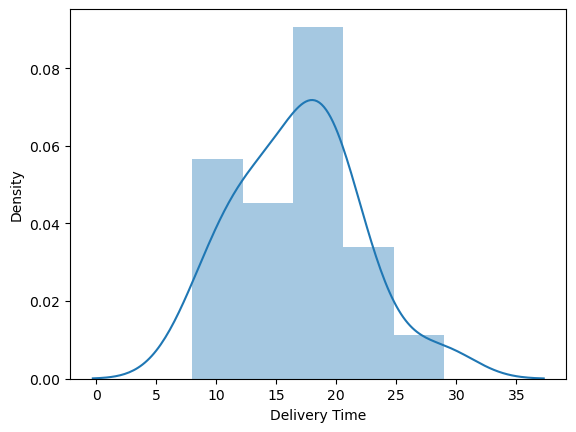

In [8]:
sns.distplot(df["Delivery Time"])
plt.show()

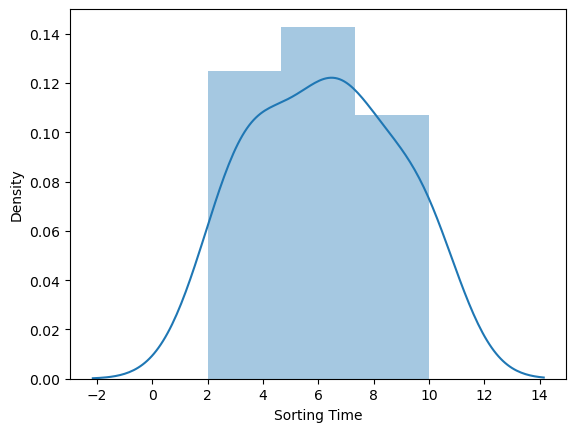

In [11]:
sns.distplot(df["Sorting Time"])
plt.show()

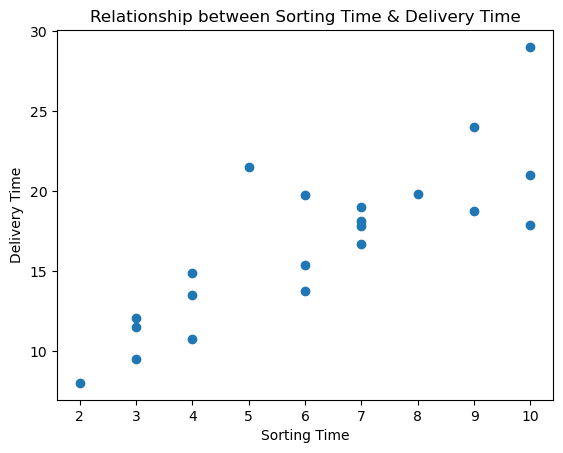

In [12]:
plt.scatter(df["Sorting Time"],df["Delivery Time"])
plt.title("Relationship between Sorting Time & Delivery Time")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

# Feature Engineering

In [13]:
# Renaming Columns

df=df.rename({"Delivery Time":"DT","Sorting Time":"ST"},axis=1)
df.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Data Transformation

Log Transformation: Transformation the response variable from y to log(y)

In [15]:
# Create Log-Transformed data

df_log=np.log(df)

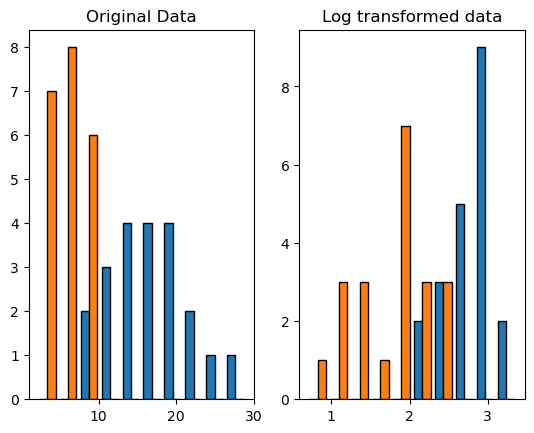

In [16]:
# define grid of plots
fig, axs=plt.subplots(nrows=1,ncols=2)

# create histograms
axs[0].hist(df,edgecolor='black')
axs[1].hist(df_log,edgecolor='black')

# add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log transformed data')
plt.show()

2.Square Root Transformation: Transform the response variable from y to √y.

In [19]:
#create log-transformed data
df_log = np.sqrt(df)

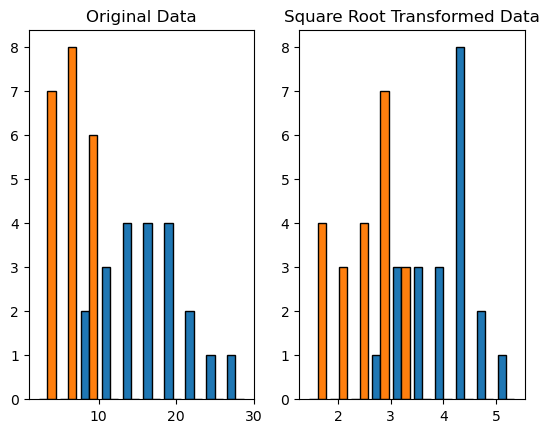

In [21]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')
plt.show()

3 Cube Root TRansformation: Transform the response variable from y to y^1/3


In [26]:
# Create cube root transformed data

df_log = np.cbrt(df)

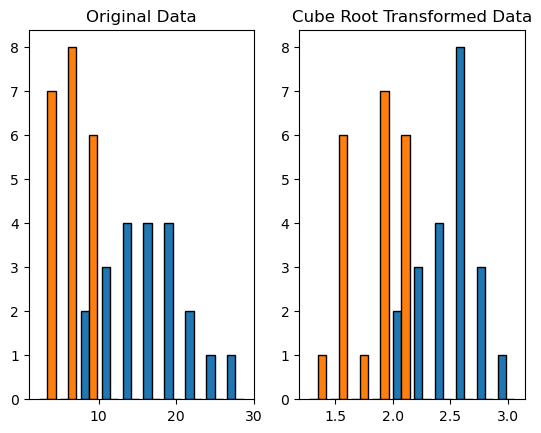

In [28]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')
plt.show()

# Correlation Analysis

In [29]:
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


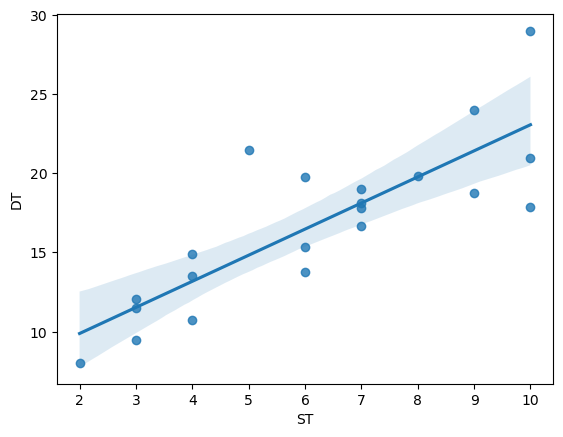

In [30]:
#sns.regplot(x=df["ST"],y=df["DT"])
sns.regplot(x=df["ST"], y=df["DT"])
plt.show()

In [31]:
x=df["DT"]
y=df["ST"]

In [32]:
n=len("DT")
b1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)
b0=(sum(y)-b1*sum(x))/n

In [33]:
y_hat=b0+b1*x
y_hat

0      7.806950
1      5.044979
2      7.346622
3      8.911738
4     10.753052
5      5.726265
6      7.070425
7      3.571928
8      6.665336
9      6.978359
10     7.376083
11     4.032257
12     6.216055
13     4.308454
14     4.503633
15     5.553182
16     5.137045
17     6.742671
18     3.019534
19     6.639557
20     7.991082
Name: DT, dtype: float64

In [62]:
pd.DataFrame({"Actual":y,"Predicted":y_hat,"Residual":y-y_hat})

,Actual,Predicted,Residual
0,10,7.806950,2.193050
1,4,5.044979,-1.044979
2,6,7.346622,-1.346622
3,9,8.911738,0.088262
4,10,10.753052,-0.753052
5,6,5.726265,0.273735
6,7,7.070425,-0.070425
7,3,3.571928,-0.571928
8,10,6.665336,3.334664
9,9,6.978359,2.021641


In [34]:
#Mean Square Error ()
mse = (sum((y-y_hat)**2))/n
mse

21.11039874407602

In [35]:
rmse = np.sqrt(mse)
rmse

4.5946053959046385

In [36]:
#R-Square

ss_res = sum((y-y_hat)**2)
ss_tot = sum((y-y.mean())**2)

In [37]:
r2 = 1-ss_res/ss_tot
r2

0.6733099678514396

# Model Building

In [38]:
model=smf.ols("DT~ST",data=df).fit()

# Model Testing

In [39]:
# Finding Coefficient parameters
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [40]:
# Finding t_value and p_value
model.tvalues,model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [41]:
# Finding R_Squre Values

model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [42]:
# Manual prediction for say sorting time 5
DT = (6.582734) + (1.649020)*(5)
DT

14.827834

In [43]:
# Automatic Prediction for say sorting time 5, 8
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [44]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred

,ST
0,5
1,8


In [45]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Linear Regression with Sciket_learn libraries

In [46]:
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [49]:
X = df[["DT"]]
Y = df["ST"]

In [50]:
X

,DT
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [53]:
model.intercept_

-0.7566733660351259

In [54]:
model.coef_

array([0.41374363])

In [55]:
y_pred = model.predict(X)


In [56]:
pd.DataFrame({"Actual":Y,"Predicted":y_pred,"Residual":Y-y_pred})

,Actual,Predicted,Residual
0,10,7.931943,2.068057
1,4,4.828866,-0.828866
2,6,7.414763,-1.414763
3,9,9.173174,-0.173174
4,10,11.241892,-1.241892
5,6,5.594291,0.405709
6,7,7.104456,-0.104456
7,3,3.173891,-0.173891
8,10,6.649338,3.350662
9,9,7.001020,1.998980


# Metrics

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y,y_pred)

1.9553633044888055

In [58]:
from sklearn.metrics import r2_score
r2_score(Y,y_pred)

0.6822714748417231

In [59]:
df.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [60]:
model.predict([[19]])

array([7.10445557])

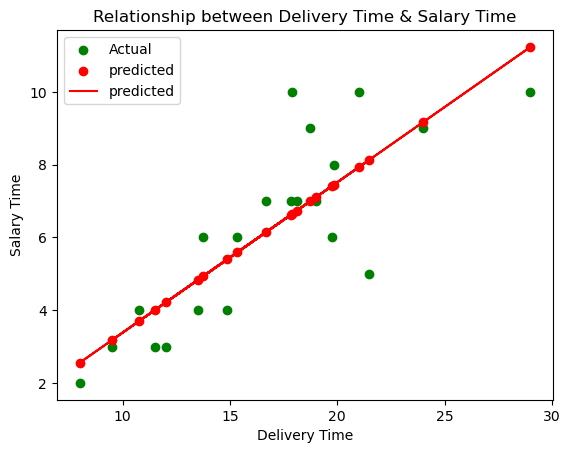

In [61]:
plt.scatter(df["DT"],df["ST"],color='green',label="Actual")
plt.scatter(df["DT"],y_pred,color='red',label="predicted")
plt.plot(df["DT"],y_pred,color='red',label="predicted")

plt.title("Relationship between Delivery Time & Salary Time")
plt.xlabel("Delivery Time")
plt.legend()
plt.ylabel("Salary Time")
plt.show()

# Linear Regression with Sciket_learn libraries

# Metrics

# Question no-2

# Salary dataset

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter("ignore")

In [64]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [65]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [66]:
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [67]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# EDA and Data Vidualization

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


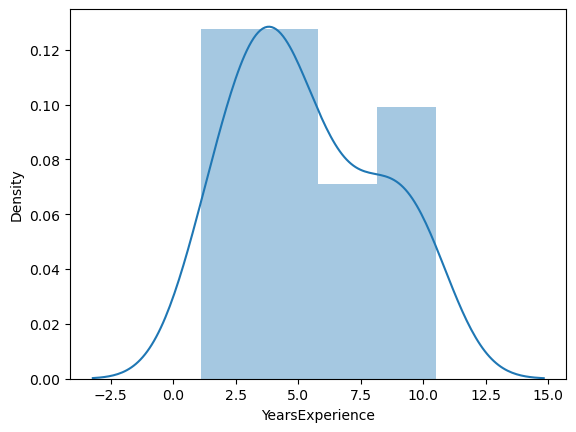

In [69]:
sns.distplot(df["YearsExperience"])
plt.show()

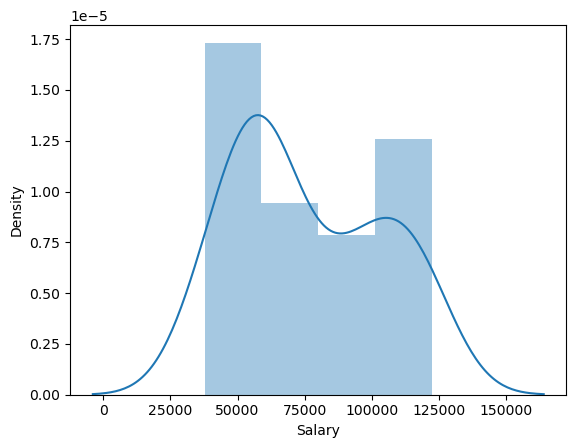

In [70]:
sns.distplot(df["Salary"])
plt.show()

In [71]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


For Co-Relation between YearsExperience and Salary

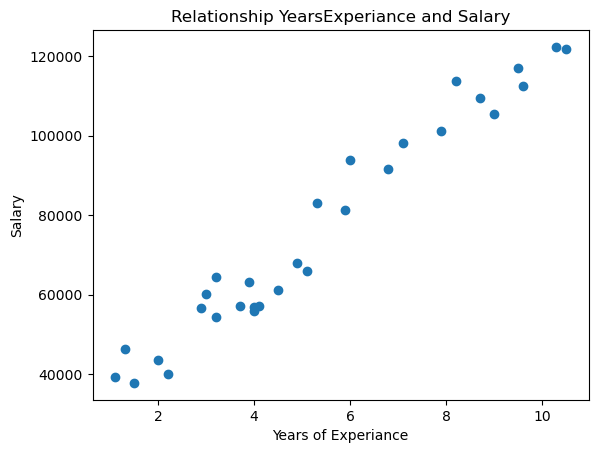

In [72]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.title("Relationship YearsExperiance and Salary")
plt.xlabel("Years of Experiance")
plt.ylabel("Salary")
plt.show()

# Data Transformation

1. Log Transformation: Transform the response variable from y to log(y)

In [74]:
#create log_transformed data
df_log=np.log(df)

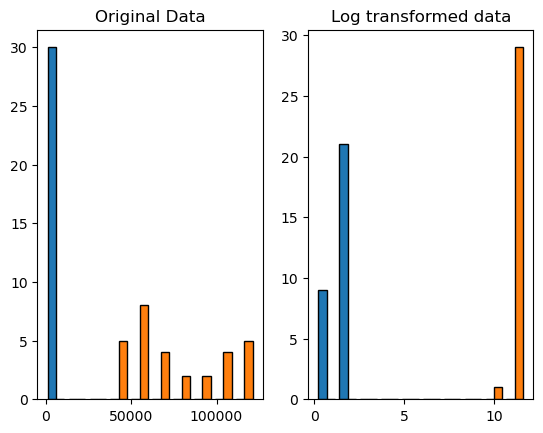

In [75]:
# define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#create histograms
axs[0].hist(df,edgecolor="black")
axs[1].hist(df_log,edgecolor="black")

#add title to each histogram
axs[0].set_title("Original Data")
axs[1].set_title("Log transformed data")
plt.show()

In [77]:
first_model = smf.ols("Salary~YearsExperience",data=df).fit()
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [78]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        12:27:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Root Transformation: Transform the response variable from y to √y.

In [86]:
# Create log-transformed data
df_log = np.sqrt(df)

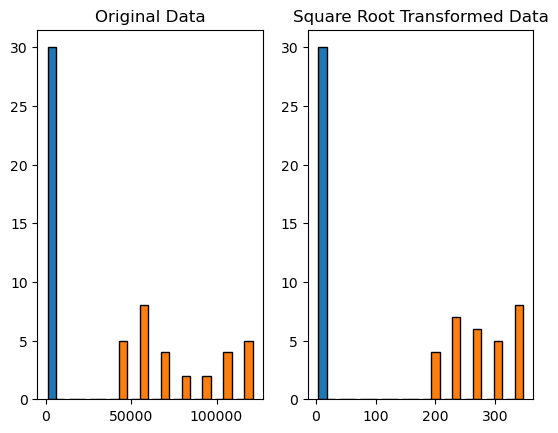

In [87]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')
plt.show()

Cube Root Transformation: Transform the response variable from y to y1/3.

In [88]:
#create log-transformed data
df_log = np.cbrt(df)

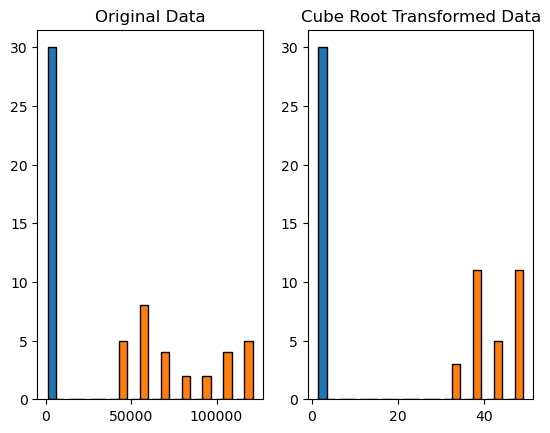

In [90]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')
plt.show()

In [91]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        12:34:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation Analysis

In [92]:
 df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


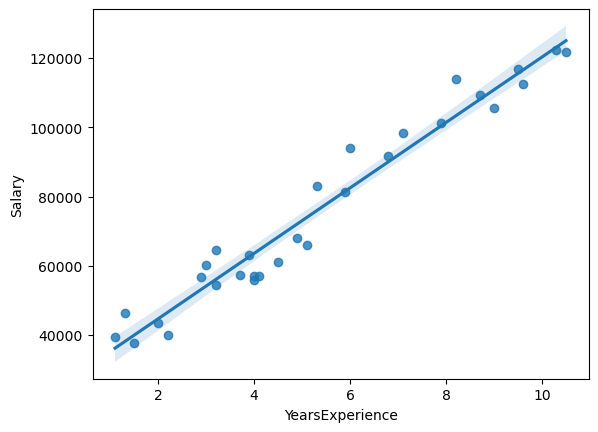

In [94]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])
plt.show()

# Model Building

In [95]:
model = smf.ols('Salary~YearsExperience',data=df).fit()

# Model Testing

In [96]:
#Finding Cofficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [97]:
#Finding p_values and t_values
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [98]:
#Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [99]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [100]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [101]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [102]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# Linear Regression with Sciket_learn librarries

In [103]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [104]:
X = df[["YearsExperience"]]
Y = df["Salary"]

In [105]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [107]:
model.intercept_

25792.20019866871

In [108]:
model.coef_

array([9449.96232146])

In [109]:
y_pred = model.predict(X)

In [110]:
pd.DataFrame({"Actual":Y,"Predicted":y_pred,"Residual":Y-y_pred})

,Actual,Predicted,Residual
0,39343.0,36187.158752,3155.841248
1,46205.0,38077.151217,8127.848783
2,37731.0,39967.143681,-2236.143681
3,43525.0,44692.124842,-1167.124842
4,39891.0,46582.117306,-6691.117306
5,56642.0,53197.090931,3444.909069
6,60150.0,54142.087163,6007.912837
7,54445.0,56032.079627,-1587.079627
8,64445.0,56032.079627,8412.920373
9,57189.0,60757.060788,-3568.060788


# Metrics

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
mean_squared_error(Y,y_pred)

31270951.722280968

In [113]:
from sklearn.metrics import r2_score
r2_score(Y,y_pred)

0.9569566641435086

In [115]:
model.predict([[8]])

array([101391.89877031])

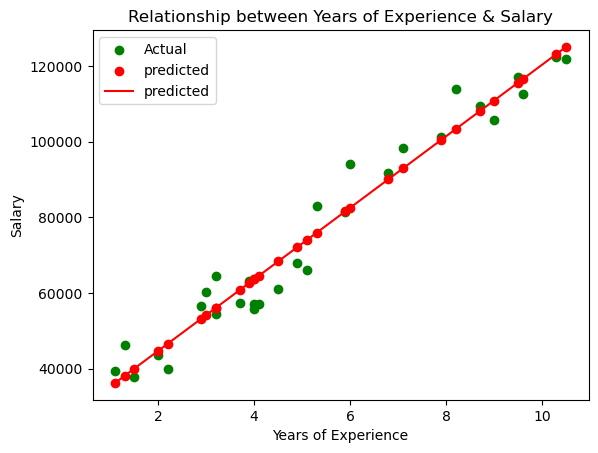

In [116]:
plt.scatter(df["YearsExperience"],df["Salary"],color='green',label="Actual")
plt.scatter(df["YearsExperience"],y_pred,color='red',label="predicted")
plt.plot(df["YearsExperience"],y_pred,color='red',label="predicted")

plt.title("Relationship between Years of Experience & Salary")
plt.xlabel("Years of Experience")
plt.legend()
plt.ylabel("Salary")
plt.show()